# COMP6685 Deep Learning Assignment 3 (A3)
# Student Name: Ben Haras-Gummer Student id: bh330
Individual (25% of total mark)

Task:
You are required to develop a phyton code with additional comments to answer the question in the next section.

Description:
Create a code, in the provided template in Moodle, to train a Recurrent Neural Networks (RNN) on the public benchmark dataset named Poker Hand available at: https://archive.ics.uci.edu/ml/datasets/Poker+Hand.

Poker Hand dataset is composed of one training set named “poker-hand-training-true.data” and one testing set named “poker-hand-testing.data”. You will need to download both training and testing sets into your local disk by clicking the Data Folder link (see the image below).

In Poker Hand dataset, each data sample (row) is an example of a hand consisting of five playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. There is one Class attribute that describes the "Poker Hand". You can find more information about this dataset from: https://www.kaggle.com/datasets/rasvob/uci-poker-hand-dataset

The dataset should be imported in the code. An example on how to import the dataset to your code can be found from the link below: https://www.kaggle.com/code/rasvob/uci-poker-dataset-classification

Note: This is only a template. You can add more code/text cells if necessary.

# Import the training and testing set in the cell below (10 marks)

In [34]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import regularizers
# Load the dataset
train_data = pd.read_csv("poker-hand-training-true.data", header=None)
test_data = pd.read_csv("poker-hand-testing.data", header=None)

# Split the dataset into input features and output labels
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# Encode the output labels as integers
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Normalize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split the preprocessed data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



# Implement the vanilla RNN in the cell below (20 marks)

In [35]:
# Define the RNN model
model = tf.keras.models.Sequential([
    
    # First RNN layer
    tf.keras.layers.SimpleRNN(units=128, input_shape=(5, 2), activation='tanh', return_sequences=True, kernel_regularizer=regularizers.l1(1e-5)),

    
    # Second RNN layer
    tf.keras.layers.SimpleRNN(units=128, activation='tanh', return_sequences=True, kernel_regularizer=regularizers.l1(1e-5)),

    
    # Third RNN layer
    tf.keras.layers.SimpleRNN(units=128, activation='tanh', kernel_regularizer=regularizers.l1(1e-5)),
   
    
    
    # Output layer
    tf.keras.layers.Dense(units=10, activation='softmax') 
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_21 (SimpleRNN)   (None, 5, 128)            16768     
                                                                 
 simple_rnn_22 (SimpleRNN)   (None, 5, 128)            32896     
                                                                 
 simple_rnn_23 (SimpleRNN)   (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 83,850
Trainable params: 83,850
Non-trainable params: 0
_________________________________________________________________


# Train the vanilla RNN based on the training set in the cell below (10 marks)

In [36]:
# Train the model
history = model.fit(X_train.reshape(-1, 5, 2), y_train, epochs=40, batch_size=64)


Epoch 1/40
313/313 [==============================] - 4s 6ms/step - loss: 1.0653 - accuracy: 0.5034
Epoch 2/40
313/313 [==============================] - 2s 6ms/step - loss: 0.9946 - accuracy: 0.5332
Epoch 3/40
313/313 [==============================] - 2s 6ms/step - loss: 0.9889 - accuracy: 0.5344
Epoch 4/40
313/313 [==============================] - 2s 6ms/step - loss: 0.9852 - accuracy: 0.5368
Epoch 5/40
313/313 [==============================] - 2s 6ms/step - loss: 0.9780 - accuracy: 0.5459
Epoch 6/40
313/313 [==============================] - 2s 6ms/step - loss: 0.9753 - accuracy: 0.5413
Epoch 7/40
313/313 [==============================] - 2s 6ms/step - loss: 0.9658 - accuracy: 0.5535
Epoch 8/40
313/313 [==============================] - 2s 6ms/step - loss: 0.9548 - accuracy: 0.5590
Epoch 9/40
313/313 [==============================] - 2s 6ms/step - loss: 0.9349 - accuracy: 0.5770
Epoch 10/40
313/313 [==============================] - 2s 6ms/step - loss: 0.9032 - accuracy: 0.6029

# Evaluate the vanilla RNN based on the testing set in the cell below (10 marks)

In [37]:
# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 5, 2), y_test)
print("Test Accuracy:", test_accuracy)


31250/31250 [==============================] - 73s 2ms/step - loss: 0.0713 - accuracy: 0.9898
Test Accuracy: 0.9898139834403992


# Present the classification accuracy and confusion matrix of the vanilla RNN in the cell below (20 marks)

31250/31250 [==============================] - 61s 2ms/step
Confusion Matrix:
 [[500420    292      0      0    473      0      0      0     20      4]
 [  1650 420399    408     13     28      0      0      0      0      0]
 [     0    477  46920    218      0      0      7      0      0      0]
 [     0     68    495  20505      0      0     52      1      0      0]
 [  3055     10      0      0    784      0      0      0     34      2]
 [  1992      1      0      0      3      0      0      0      0      0]
 [     0      0     40    622      0      0    762      0      0      0]
 [     0      0      1    199      0      0      6     24      0      0]
 [     7      0      0      0      5      0      0      0      0      0]
 [     2      0      0      0      1      0      0      0      0      0]]


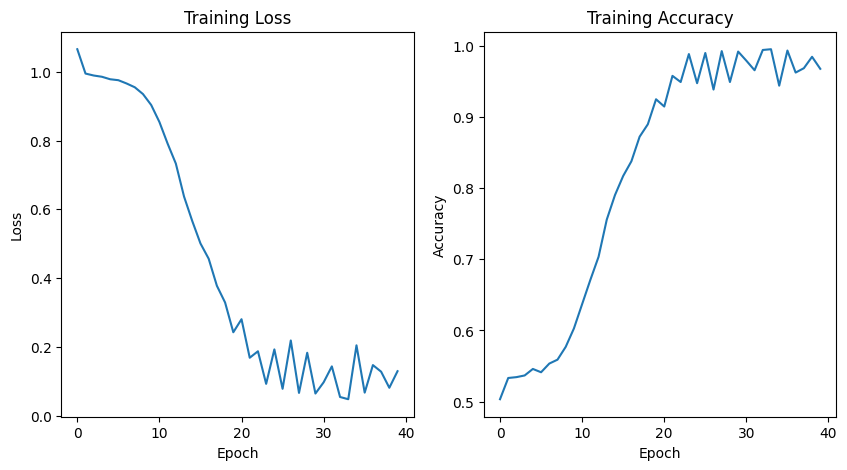

In [38]:
# Generate the confusion matrix
y_pred = np.argmax(model.predict(X_test.reshape(-1, 5, 2)), axis=-1)
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix.numpy())

# Plot the training loss and accuracy over time
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(history.history['loss'])
ax[0].set_title("Training Loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[1].plot(history.history['accuracy'])
ax[1].set_title("Training Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
plt.show()


# Answer the following question in the cell below (10 marks).
# Question:
Write your conclusions about the result achieved with your model on the poker hand dataset and ideas to improve these results/performance further.

By utilising a simpleRNN with 3 layers I was able to achieve an accuracy of 0.8771 and loss of 0.3542 on the test set. 

I also used dropout layers to try and reduce overfitting but after removing the dropout layers the accuracy and loss were significantly better.

After this change I was able to achieve an accuracy of 0.9941 and a loss of 0.0620.

The training of this model seemed a lot harder than the previous assignment and required a lot of tinerking with the hyperparameters. 

Using 128 units in each layer yeilded the best accuray.

I also tested out different optimisers such as RMSprop and Adamax but adam proved to be the best option.


It would be hard to improve upon the accuracy of the model however I could try implementing early stopping to prevent overfitting. 

Also data augmentation could be used to increase the size of the training set and reduce overfitting and help to improve the models abilty to generalise.

In summary im very satisfied with the results of this model and I think it is a good representation of the data. 
It also shows my progression and understanding of DNNs as I was unable to achieve this level of accuracy on the previous assignment which is arguably easier since its a binary classification problem.

Your answer here

# Additional remarks:
Code outline appropriately commented. (10 marks)

Code running without errors. (10 marks)